### Jitta
The following code can be used to extract info of the top 1000 best recommendations from Jitta.
```
const cards = document.getElementsByClassName("lbFdHI");

let output = []

for (let card of cards) {
    let data = [];
    // data.push(card.children[0].innerHTML)
    data.push(card.children[1].innerHTML)
    data.push(card.children[2].children[1].innerHTML)
    data.push(card.children[3].children[0].children[0].children[1].children[1].innerHTML)
    data.push(card.children[3].children[0].children[1].children[0].innerHTML)
    data.push(card.children[3].children[0].children[1].children[1].innerHTML.slice(0,1))
    output.push(data)
}

var winPrint = window.open();
winPrint.document.write('<title>Jitta</title>');
winPrint.document.write("Symbol,Score,Loss,Safety,Under<br>");

for (let i of output) {
    winPrint.document.write(i + "<br>");
}
```

```
const cards = document.getElementsByClassName("lbFdHI");

let output = []

for (let card of cards) {
    let data = [];
    // data.push(card.children[0].innerHTML)
    data.push(card.children[1].innerHTML)
    data.push(card.children[2].children[1].innerHTML)
    data.push(card.children[3].children[0].children[0].children[1].children[1].innerHTML)
    let s = card.children[3].children[0].children[1].children[0].innerHTML
    data.push(s=='>1,000%' ? '>1000%' : s)
    data.push(card.children[3].children[0].children[1].children[1].innerHTML.slice(0,1))
    output.push(data)
}

var winPrint = window.open();
winPrint.document.write('<title>Jitta</title>');
winPrint.document.write("Symbol,Score,Loss,Safety,Under<br>");

for (let i of output) {
    winPrint.document.write(i + "<br>");
}
```

### `yfinance`

yfinance pulls stock OHLC data from Yahoo Finance. Data dates back to as early as 1960 for KO, and includes `'Adj Close'` data to account for dividends and splits.

In [ ]:
# !pip install yfinance
import yfinance as yf

start = '1950-12-01'
data = yf.download(['AAPL', 'KO', 'SPY','Z74.SI'], start).iloc[-2:]['Close']
# data['Adj Close'].plot(subplots=True, layout=(1,3), figsize=(20,5), sharey=False, logy=False);

stocks = ['AAPL', 'MSFT', 'AMD']
pd.concat([yf.Ticker(t).dividends for t in stocks], keys=stocks)

      Date                     
AAPL  1987-05-11 00:00:00-04:00    0.000536
      1987-08-10 00:00:00-04:00    0.000536
      1987-11-17 00:00:00-05:00    0.000714
      1988-02-12 00:00:00-05:00    0.000714
      1988-05-16 00:00:00-04:00    0.000714
                                     ...   
MSFT  2021-11-17 00:00:00-05:00    0.620000
      2022-02-16 00:00:00-05:00    0.620000
      2022-05-18 00:00:00-04:00    0.620000
      2022-08-17 00:00:00-04:00    0.620000
      2022-11-16 00:00:00-05:00    0.680000
Name: Dividends, Length: 153, dtype: float64

[*********************100%***********************]  3 of 3 completed


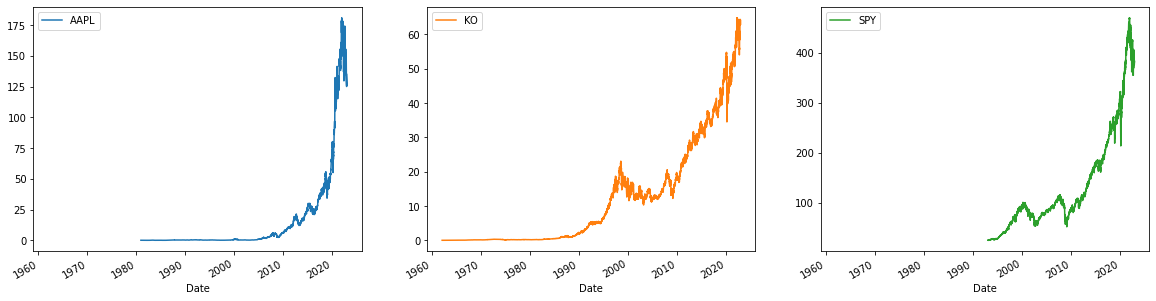

In [ ]:
# !pip install yfinance
import yfinance as yf
import numpy as np

start = '1950-12-01'
end = '2020-12-25'
data = yf.download(['AAPL', 'KO', 'SPY'], start)[['Adj Close','Volume']]
data['Adj Close'].plot(subplots=True, layout=(1,3), figsize=(20,5), sharey=False, logy=False);

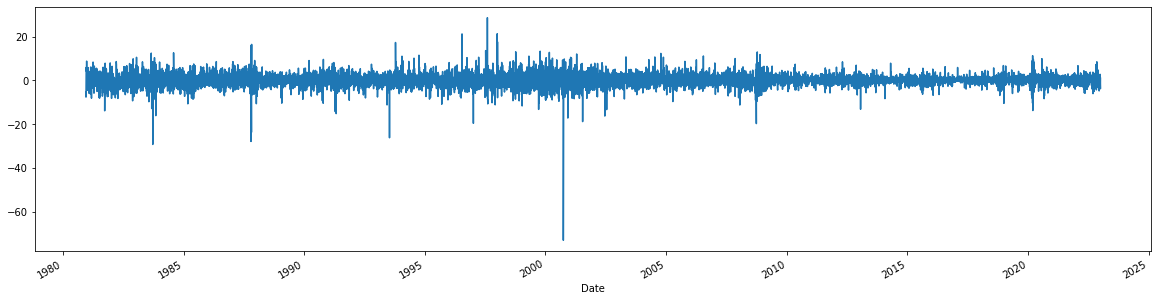

In [ ]:
np.log(data.iloc[:,0]).diff().mul(100).dropna().plot(figsize=(20,5));
# data.pct_change().mul(100).dropna().plot(figsize=(20,5))

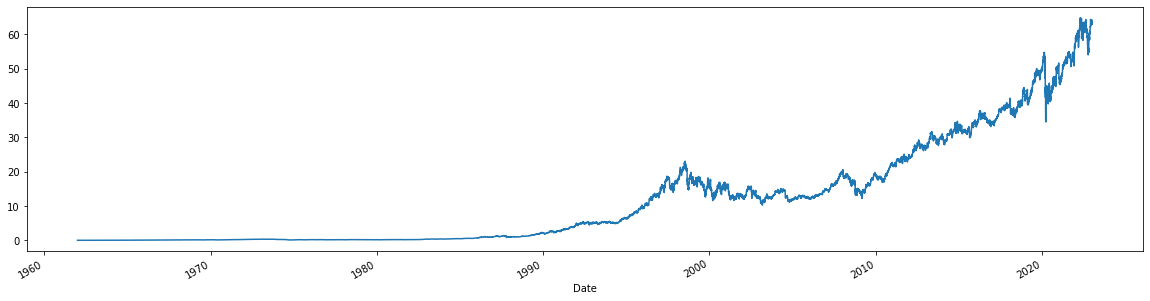

In [ ]:
data.iloc[:,1].plot(figsize=(20,5));

### `pandas_datareader.data (pdd)`
`pdd` allows data import from various services, some requiring API keys for access.

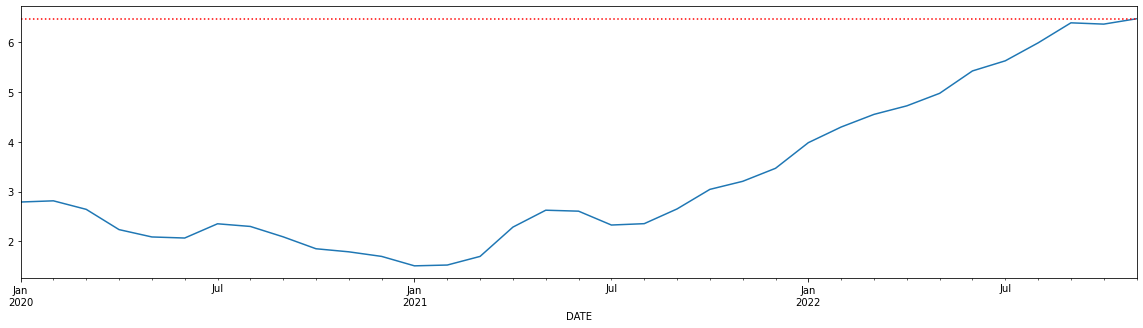

In [ ]:
import pandas_datareader.data as pdd
from datetime import datetime as dt
import matplotlib.pyplot as plt

start = dt(2020, 1, 1)
# end = dt(2022, 12, 1)
df = pdd.DataReader(['CPIAUCSL', 'CPILFESL', 'SP500', 'GDP', 'DGS10', 'FPCPITOTLZGUSA', 'CORESTICKM159SFRBATL'], 'fred', start)
data = 'CORESTICKM159SFRBATL'
df[data].dropna().plot(figsize=(20,5))
plt.axhline(y = df[data].dropna()[-1], color = 'r', linestyle = 'dotted')

In [ ]:
pdd.DataReader('ticker=RGDPUS', 'econdb').tail()

TableName                                                                                                                                   T10106
SeriesCode                                                                                                                                  A191RX
Table                                                                            Table 1.1.6. Real Gross Domestic Product, Chained Dollars (A) (Q)
Series description                                                                                                          Gross domestic product
CL_UNIT                                                                                                                                      Level
CL_FREQ                                                                                                                                          Q
Note               Table 1.1.6. Real Gross Domestic Product, Chained Dollars [Billions of chained (2012) dollars] - LastRevised: December 22, 2022
None                                                                                                                                          None
TIME_PERIOD                                                                                                                                       
2021-07-01                                                   19672594                                                                             
2021-10-01                                                   20006180                                                                             
2022-01-01                                                   19924088                                                                             
2022-04-01                                                   19895272                                                                             
2022-07-01                                                   20054664

In [ ]:
df = pdd.DataReader('dataset=NAMQ_10_GDP&v=Geopolitical entity (reporting)&h=TIME&from=2018-05-01&to=2021-01-01&\
GEO=[AL,AT,BE,BA,BG,HR,CY,CZ,DK,EE,EA19,FI,FR,DE,EL,HU,IS,IE,IT,XK,LV,LT,LU,MT,ME,NL,MK,NO,PL,PT,RO,RS,SK,SI,ES,SE,CH,TR,UK]&\
NA_ITEM=[B1GQ]&S_ADJ=[SCA]&UNIT=[CLV10_MNAC]', 'econdb')

df

Frequency                                                                                 Quarterly  \
Unit of measure                     Chain linked volumes (2010), million units of national currency   
Seasonal adjustment                                           Seasonally and calendar adjusted data   
National accounts indicator (ESA10)                         Gross domestic product at market prices   
Geopolitical entity (reporting)                                                             Austria   
TIME_PERIOD                                                                                           
2018-07-01                                                                       83376                
2018-10-01                                                                       84443                
2019-01-01                                                                       84760                
2019-04-01                                                                       84523                
2019-07-01                                                                       84877                
2019-10-01                                                                       84472                
2020-01-01                                                                       82356                
2020-04-01                                                                       73032                
2020-07-01                                                                       81286                
2020-10-01                                                                       79723                
2021-01-01                                                                       78919                

Frequency                                                                     \
Unit of measure                                                                
Seasonal adjustment                                                            
National accounts indicator (ESA10)                                            
Geopolitical entity (reporting)     Belgium Bulgaria Croatia Cyprus  Czechia   
TIME_PERIOD                                                                    
2018-07-01                           101511    21837   12156   5330  1213636   
2018-10-01                           102503    22030   12211   5427  1222602   
2019-01-01                           102767    22306   12460   5553  1233752   
2019-04-01                           103327    22556   12529   5599  1242059   
2019-07-01                           104080    22598   12518   5646  1250401   
2019-10-01                           104708    22861   12507   5695  1256445   
2020-01-01                           101701    21996   12371   5660  1215704   
2020-04-01                            90109    20933   10554   5011  1108129   
2020-07-01                           100680    21685   11165   5315  1185180   
2020-10-01                           100149    22079   11792   5524  1198697   
2021-01-01                           101516    22686   12658   5622  1192515   

Frequency                                                            ...  \
Unit of measure                                                      ...   
Seasonal adjustment                                                  ...   
National accounts indicator (ESA10)                                  ...   
Geopolitical entity (reporting)     Denmark Estonia Finland  France  ...   
TIME_PERIOD                                                          ...   
2018-07-01                           524168    4921   50626  554155  ...   
2018-10-01                           526786    4976   50605  557477  ...   
2019-01-01                           525636    5052   50995  561312  ...   
2019-04-01                           530920    5060   51408  565217  ...   
2019-07-01                           533348    5075   51432  565113  ...   
2019-10-01                           531726    5134

In [ ]:
print(pdd.DataReader('5_Industry_Portfolios', 'famafrench')['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202211 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (4 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (4 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


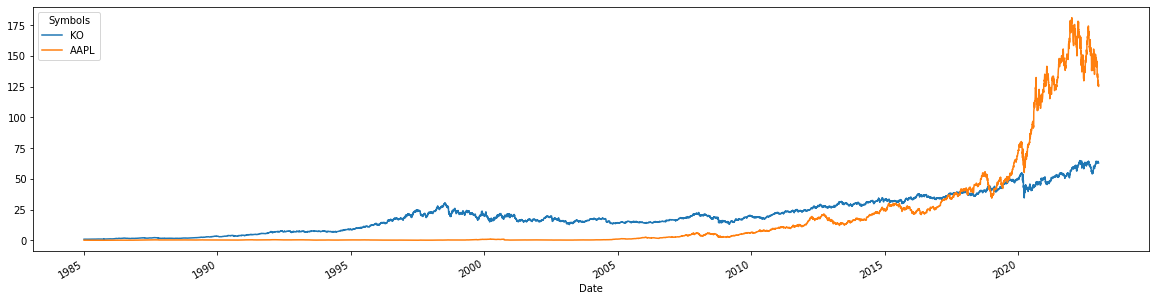

In [ ]:
pdd.DataReader(['KO', 'AAPL'], 'stooq', start=1985)['Close'].plot(figsize=(20,5))

### `pandas_datareader.wb (pdw)`
[`pdw`](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html#module-pandas_datareader.wb) allows data import from World Bank.

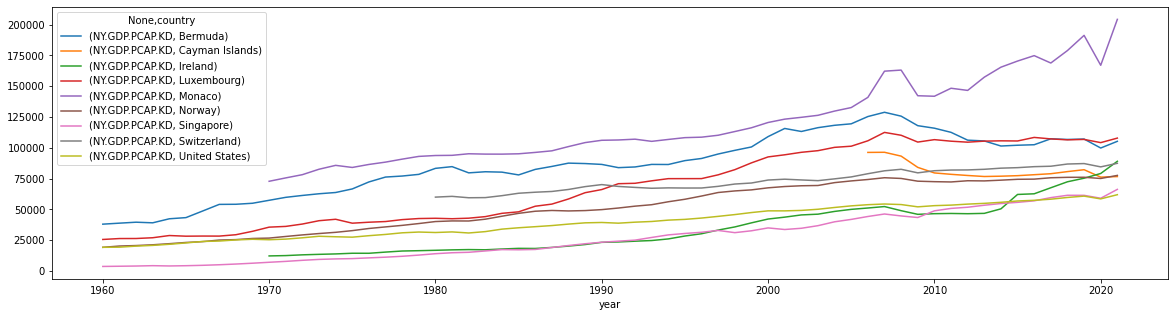

In [ ]:
import pandas_datareader.wb as pdw
from datetime import datetime as dt

start = dt(1950, 1, 1)
end = dt(2023, 12, 30)
indicator_id = 'NY.GDP.PCAP.KD'
# 'FP.CPI.TOTL.ZG' 'CPTOTSAXNZGY' 'NY.GDP.PCAP.KD'

high = ['MC','LU','BM','IE','CH','NO','KY','SG','US','QA','AU','DK','IS','SE','NL','FI','AT','GB','HK','CA']
high = ['MC','LU','BM','IE','CH','NO','KY','SG','US'] #,'QA','AU','DK','IS','SE','NL','FI','AT','GB','HK','CA']

# https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/pandas_multiindex.ipynb
gdp_per_capita = pdw.download(indicator=indicator_id, start=start, end=end, country=high)

gdp_per_capita.pivot_table(index='year', columns='country').plot(figsize=(20,5))
# gdp_per_capita.unstack().transpose()

In [ ]:
countries = pdw.get_countries()
high = [i for i in countries[countries['incomeLevel']=='High income']['iso2c']]

In [ ]:
gdp = gdp_per_capita.pivot_table(index='year', columns='country')[-1:].transpose().loc['NY.GDP.PCAP.KD','2021'].sort_values(ascending=False).head(20)
# [i for i in countries.merge(gdp, left_on='name', right_index=True).sort_values('2021', ascending=False)['iso2c']]

In [ ]:
# pdw.search('gdp.*%').iloc[:,:2]

In [ ]:
ind = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
dat = pdw.download(indicator=ind, country='all', start=2011, end=2021).dropna()
dat.info()

ReadTimeout: ignored

In [1]:
# https://pypi.org/project/fundamentalanalysis/

# !pip install fundamentalanalysis
import fundamentalanalysis as fa

ticker = "AAPL"
api_key = "4476815eb0031e5d572664c09df8af93"

# Show the available companies
companies = fa.available_companies(api_key)

# Collect general company information
profile = fa.profile(ticker, api_key)

# Collect recent company quotes
quotes = fa.quote(ticker, api_key)

# Collect market cap and enterprise value
entreprise_value = fa.enterprise(ticker, api_key)

# Show recommendations of Analysts
ratings = fa.rating(ticker, api_key)

# Obtain DCFs over time
dcf_annually = fa.discounted_cash_flow(ticker, api_key, period="annual")

# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")

# Collect the Income Statements
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

# Collect the Cash Flow Statements
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")

# Show Key Metrics
key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")

# Show a large set of in-depth ratios
financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")

# Show the growth of the company
growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")

# Download general stock data
stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

# Download detailed stock data
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")

# Download dividend history
dividends = fa.stock_dividend(ticker, api_key, begin="2000-01-01", end="2020-01-01")

In [2]:
key_metrics_annually.loc[['roe','roic','peRatio','pfcfRatio']].transpose().head().mean()

roe           1.103042
roic          0.389372
peRatio      24.751166
pfcfRatio    22.318780
dtype: float64

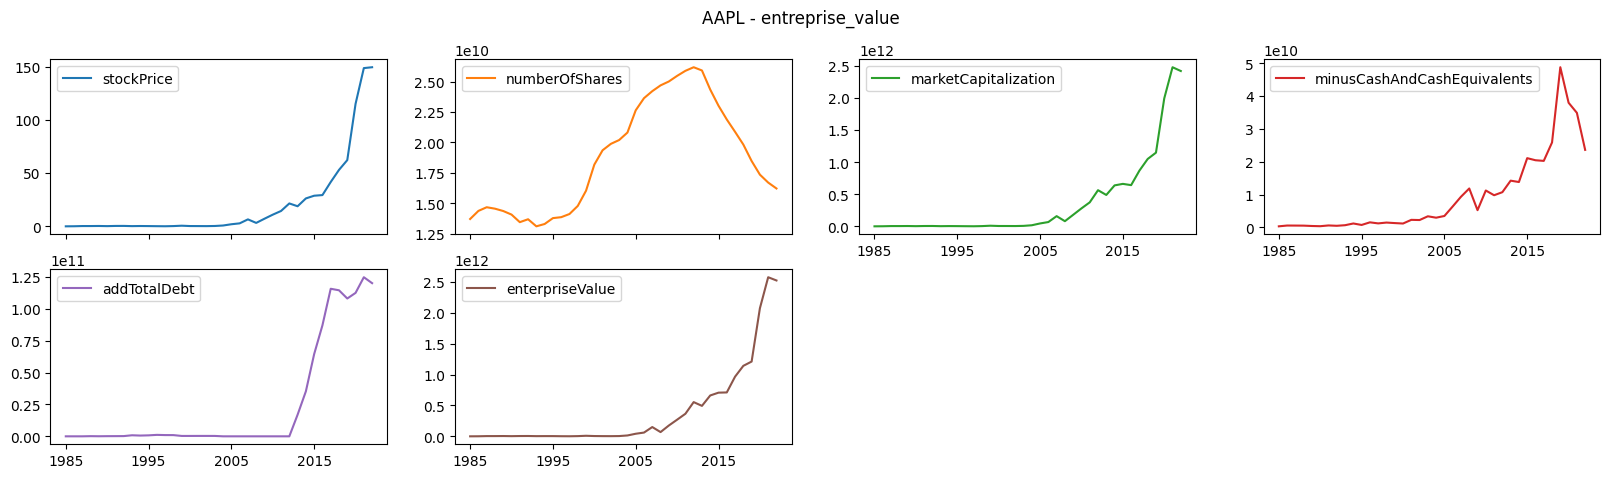

In [3]:
entreprise_value.transpose().sort_index().plot(subplots=True, layout=(2,4), figsize=(20,5), sharey=False, logy=False, title=ticker+' - entreprise_value');

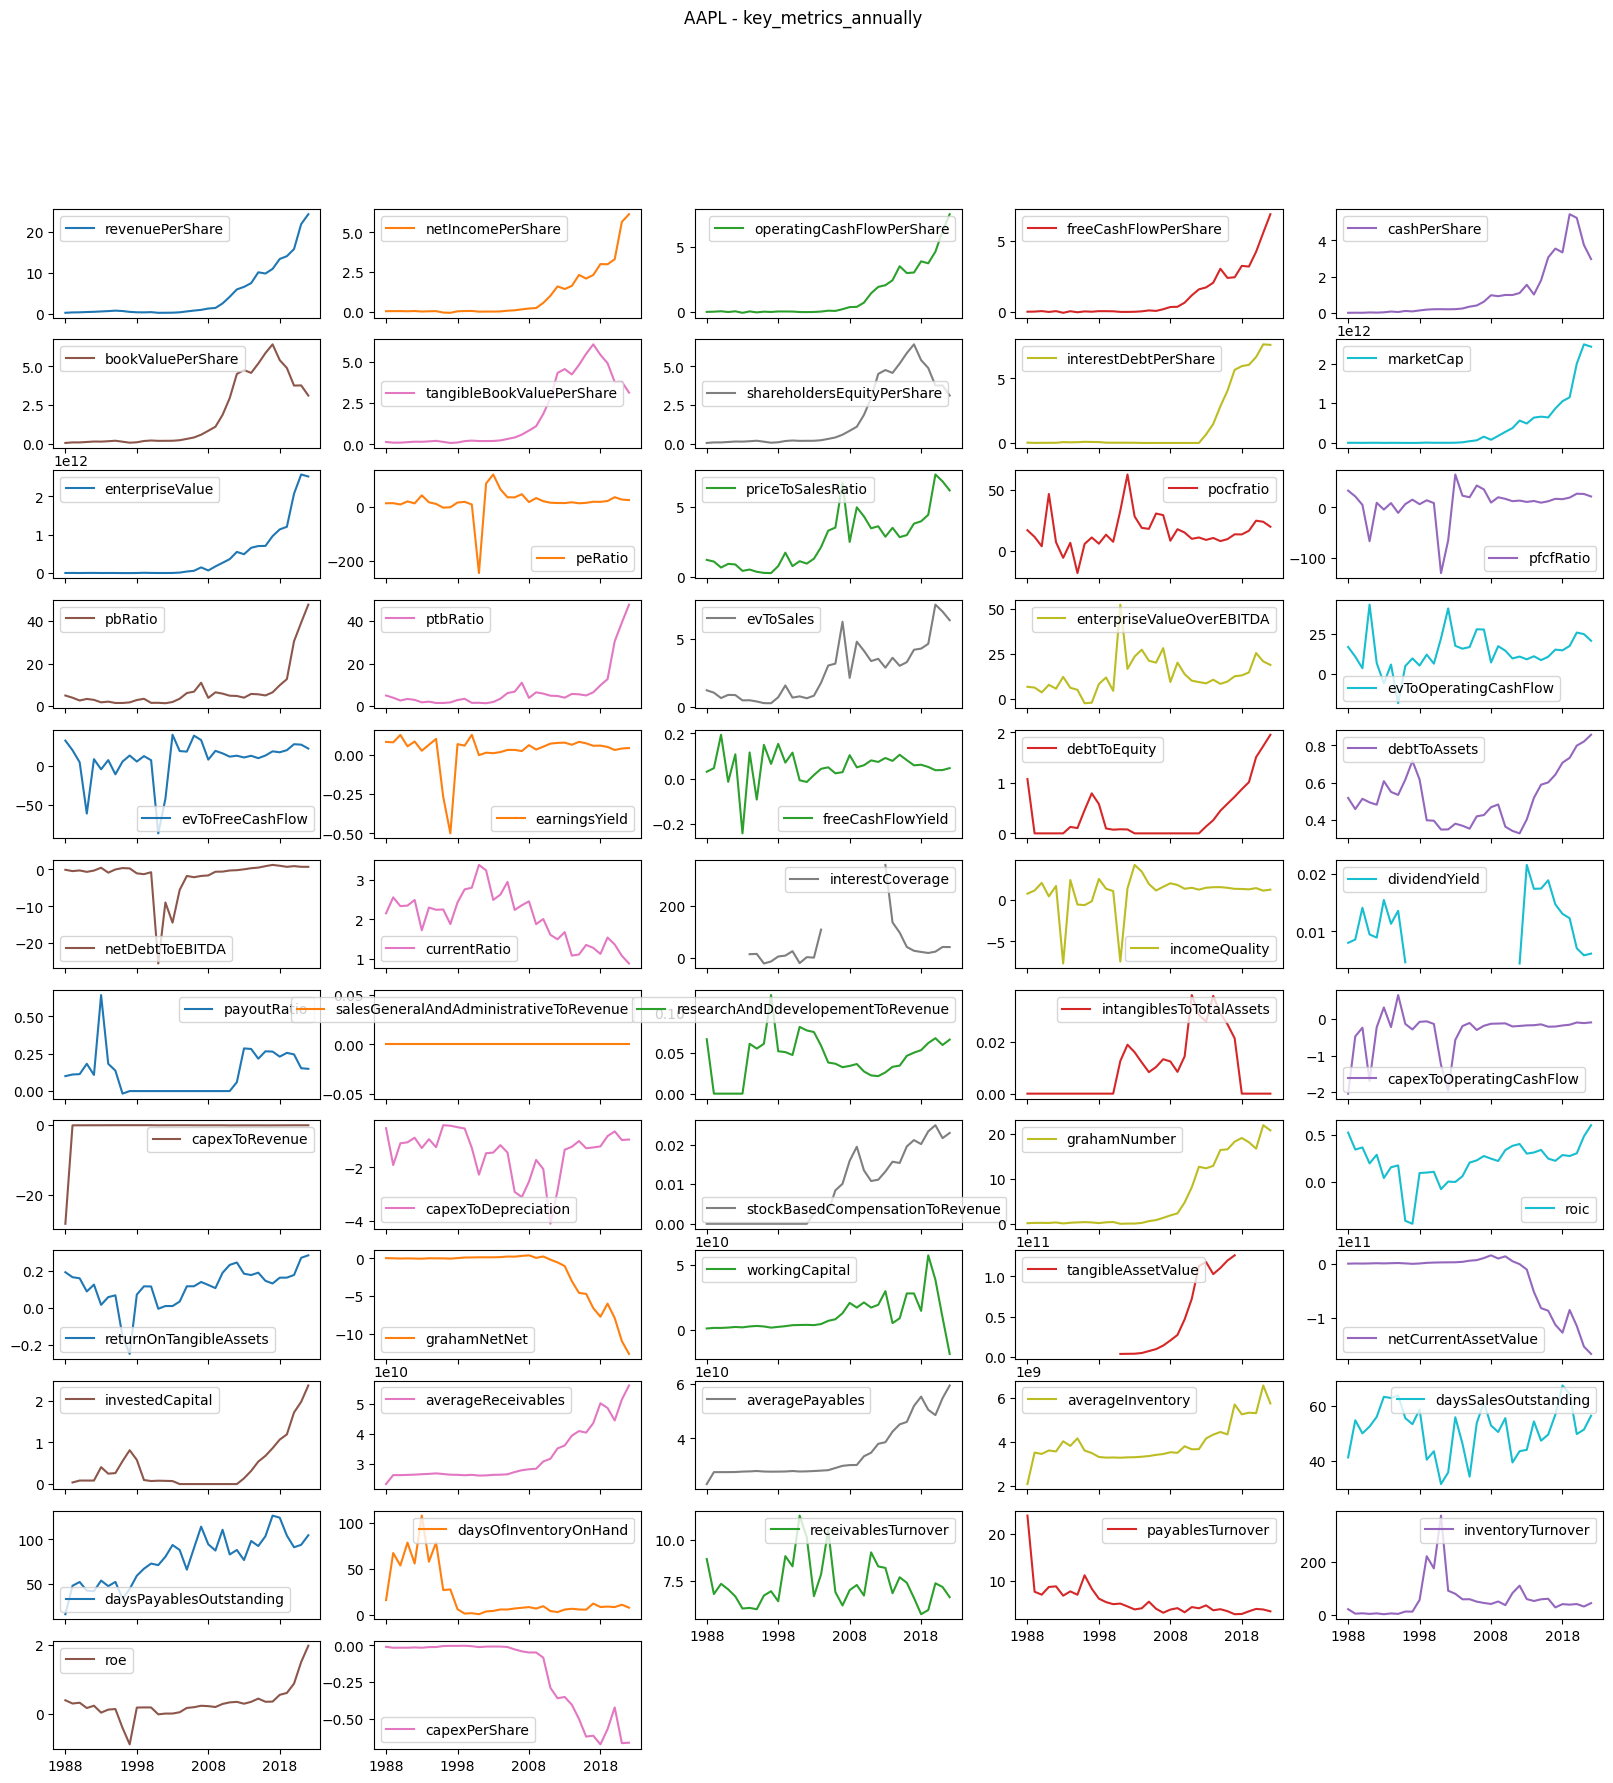

In [4]:
item = 'key_metrics_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

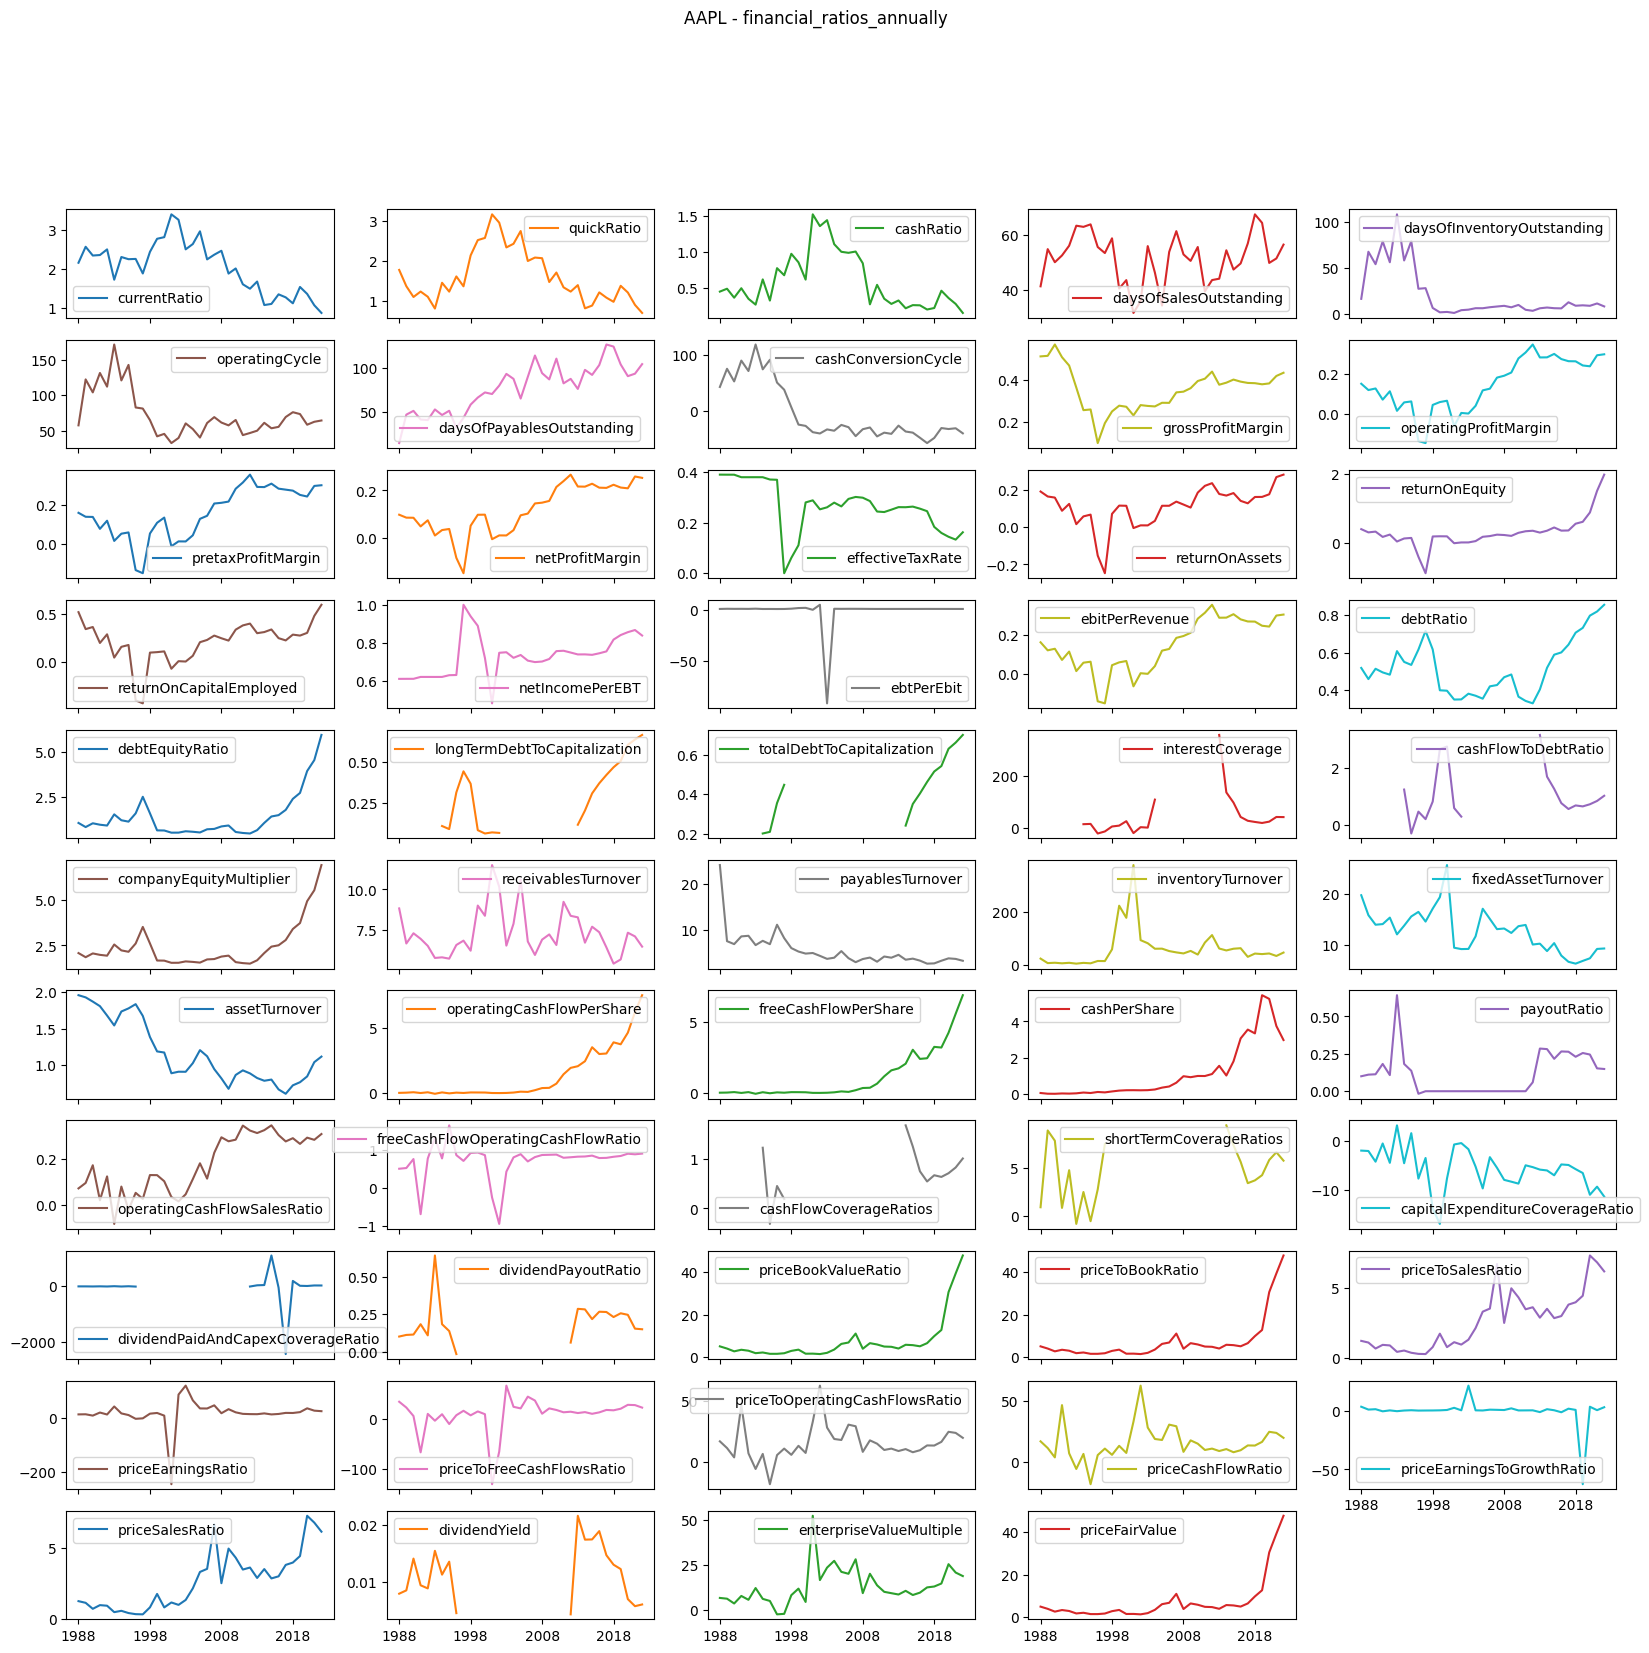

In [5]:
item = 'financial_ratios_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

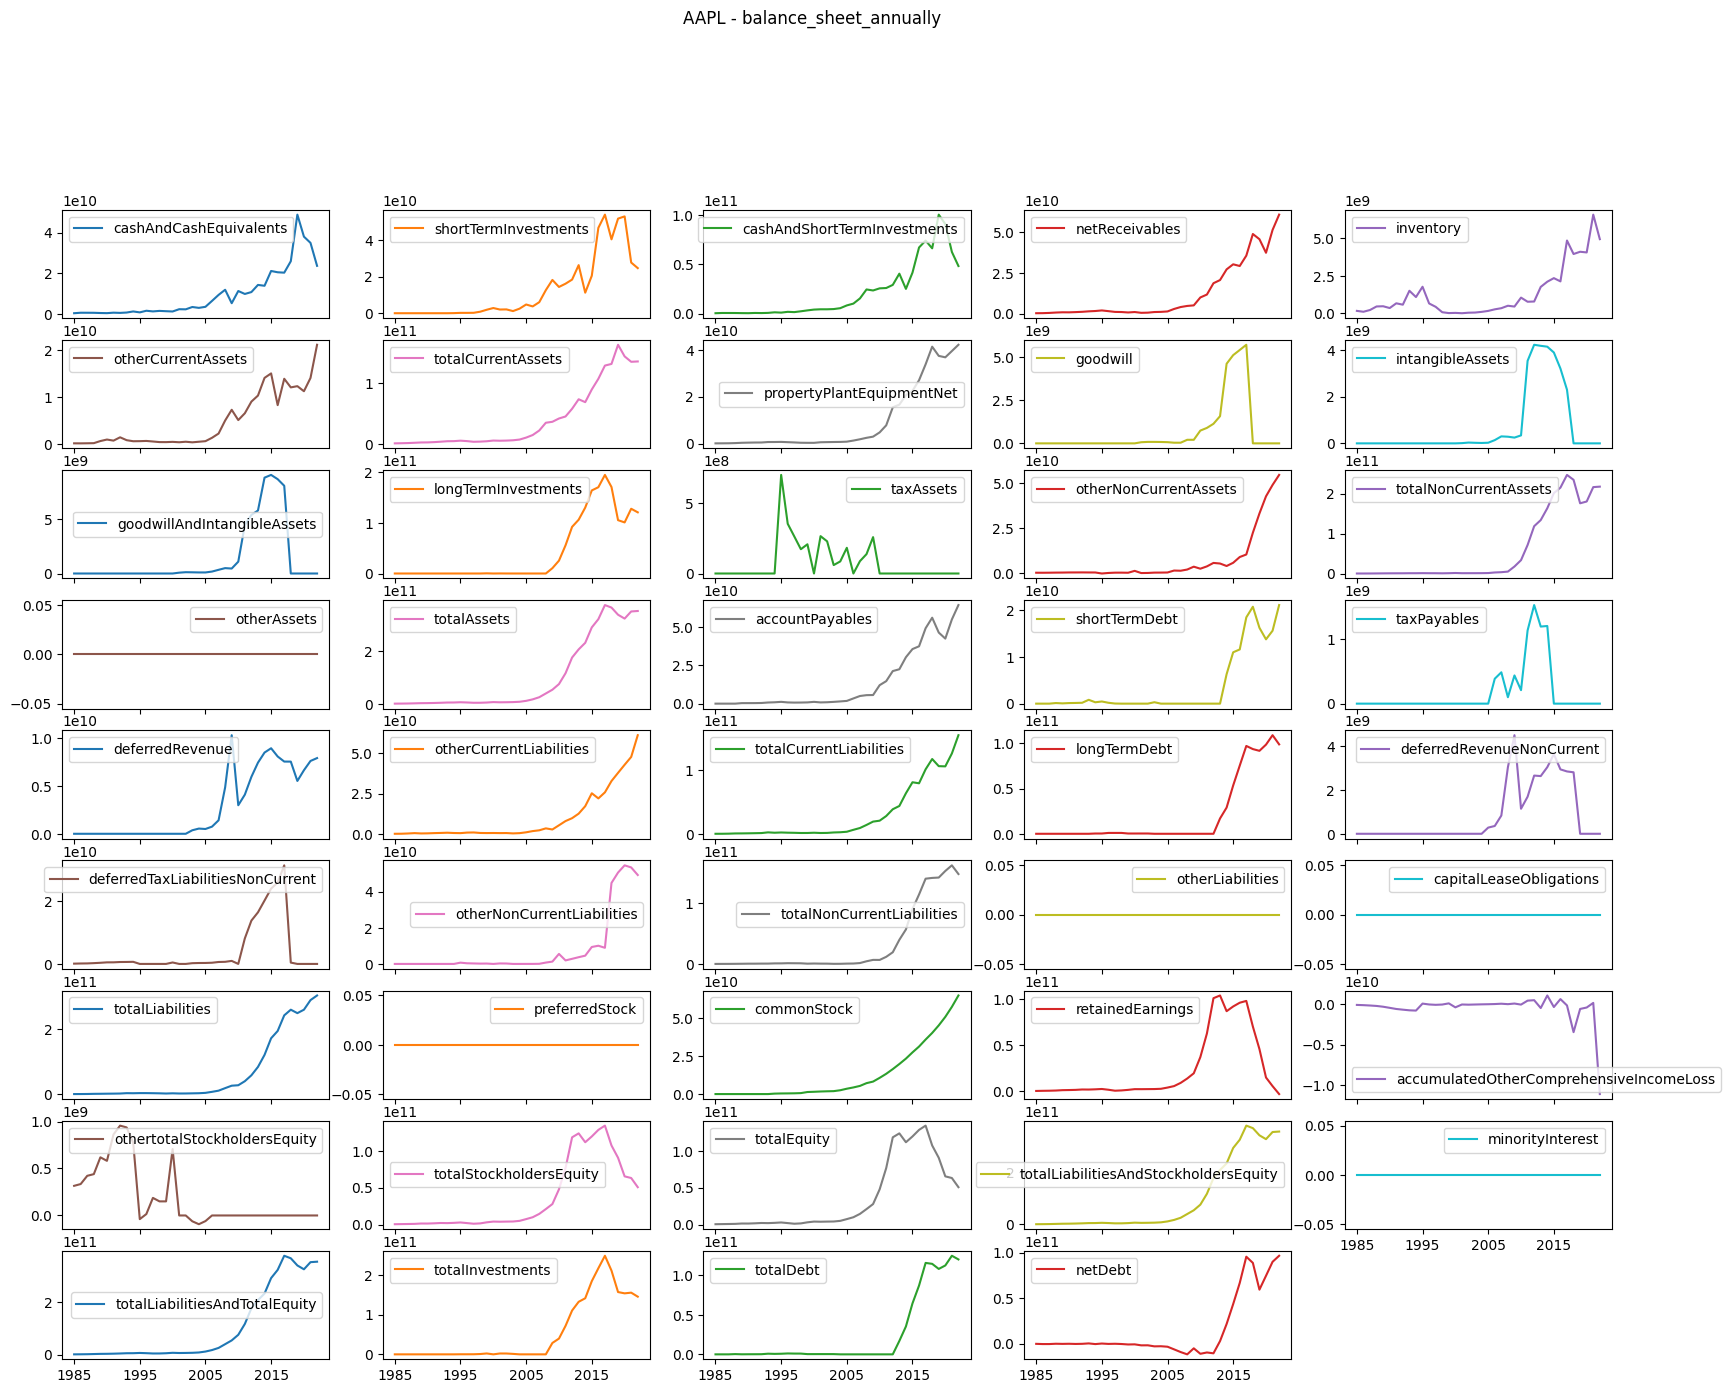

In [6]:
item = 'balance_sheet_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

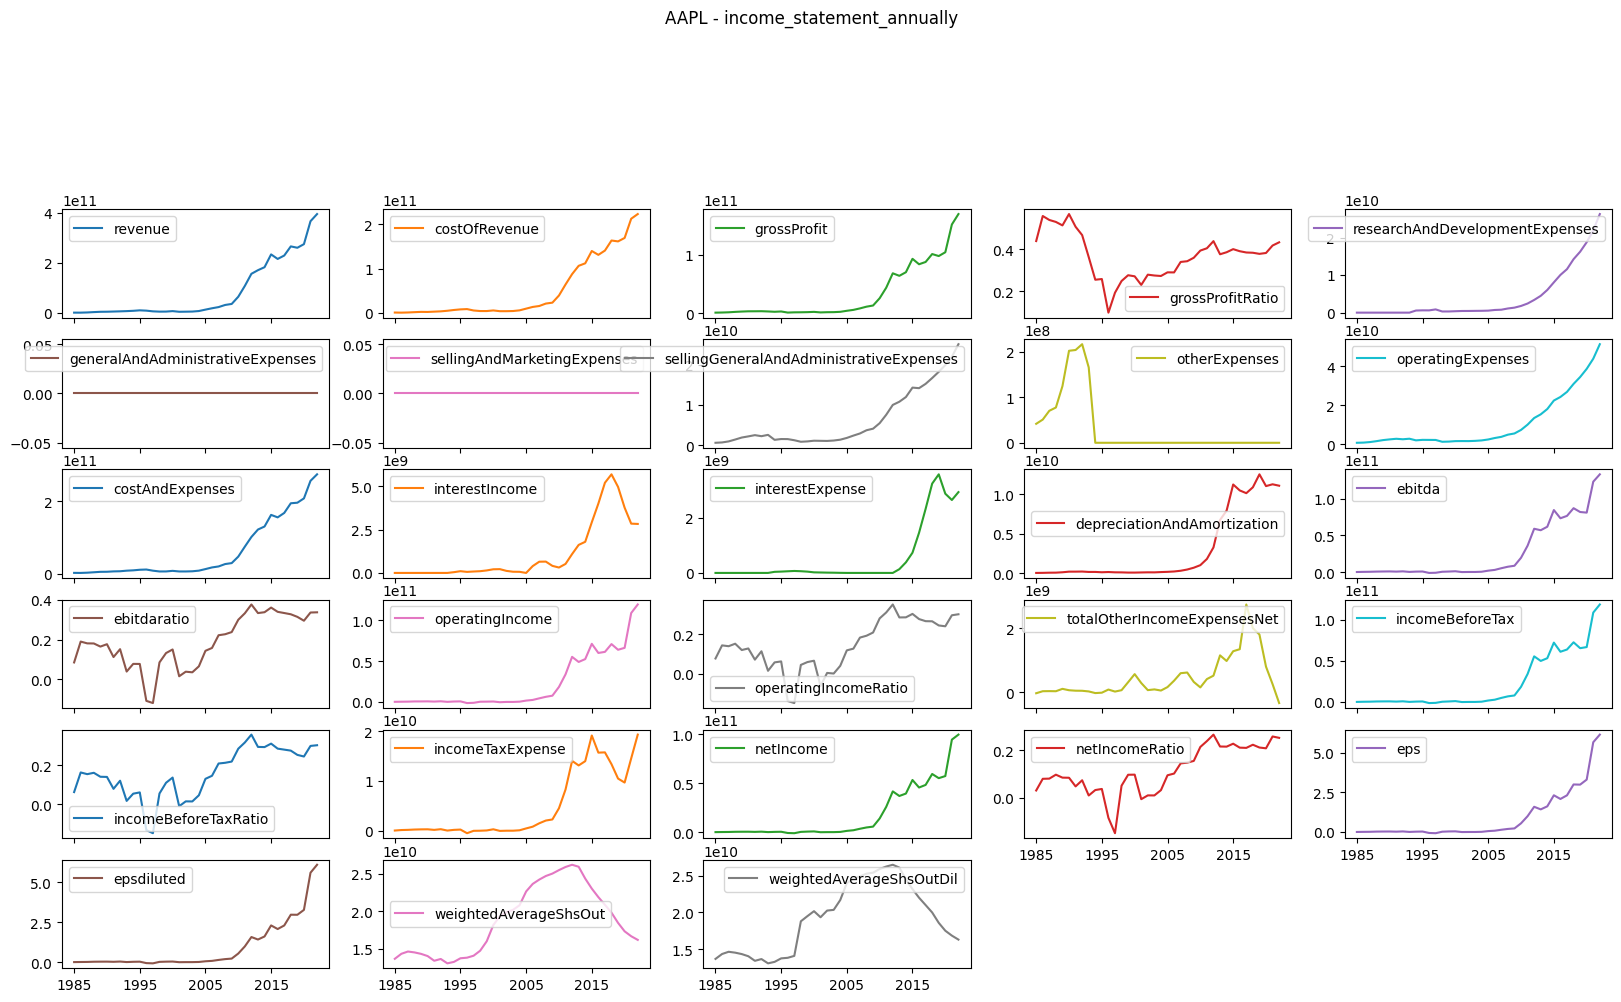

In [7]:
item = 'income_statement_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

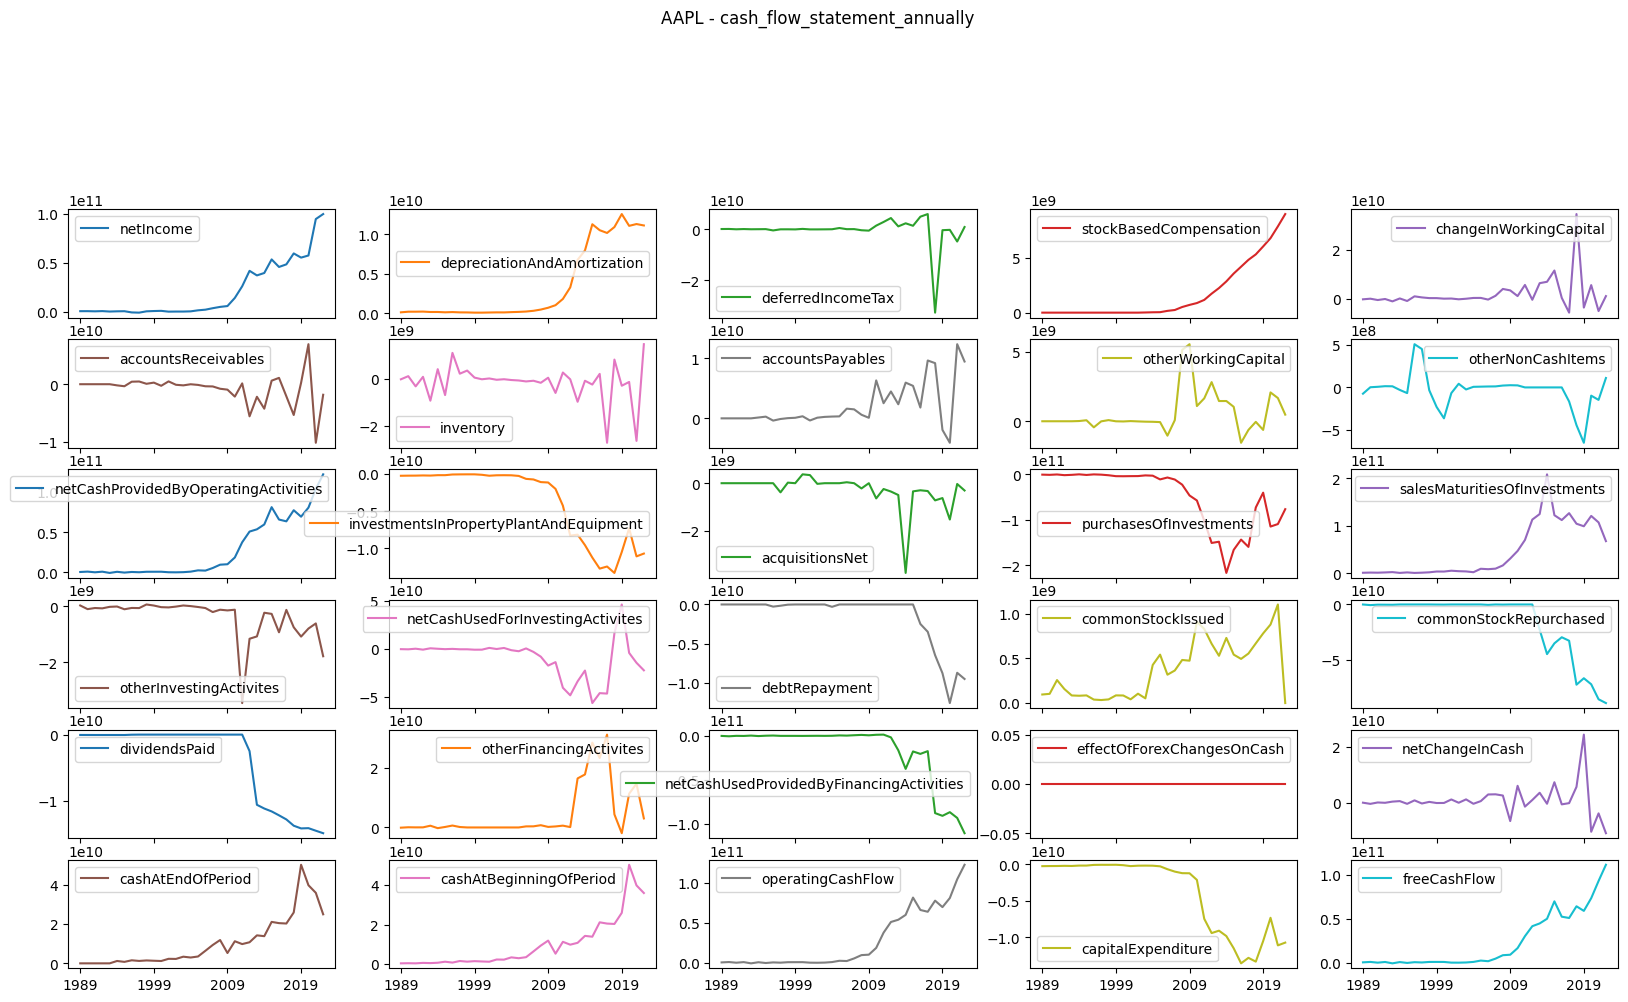

In [8]:
item = 'cash_flow_statement_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

In [ ]:
companies[companies['name'].str.contains('Yoma')]

name   price   exchange exchangeShortName  \
symbol                                                                      
Z59.SI  Yoma Strategic Holdings Ltd.  0.1180        SES          EURONEXT   
YMAIF   Yoma Strategic Holdings Ltd.  0.0756  Other OTC               PNK   

         type  
symbol         
Z59.SI  stock  
YMAIF   stock

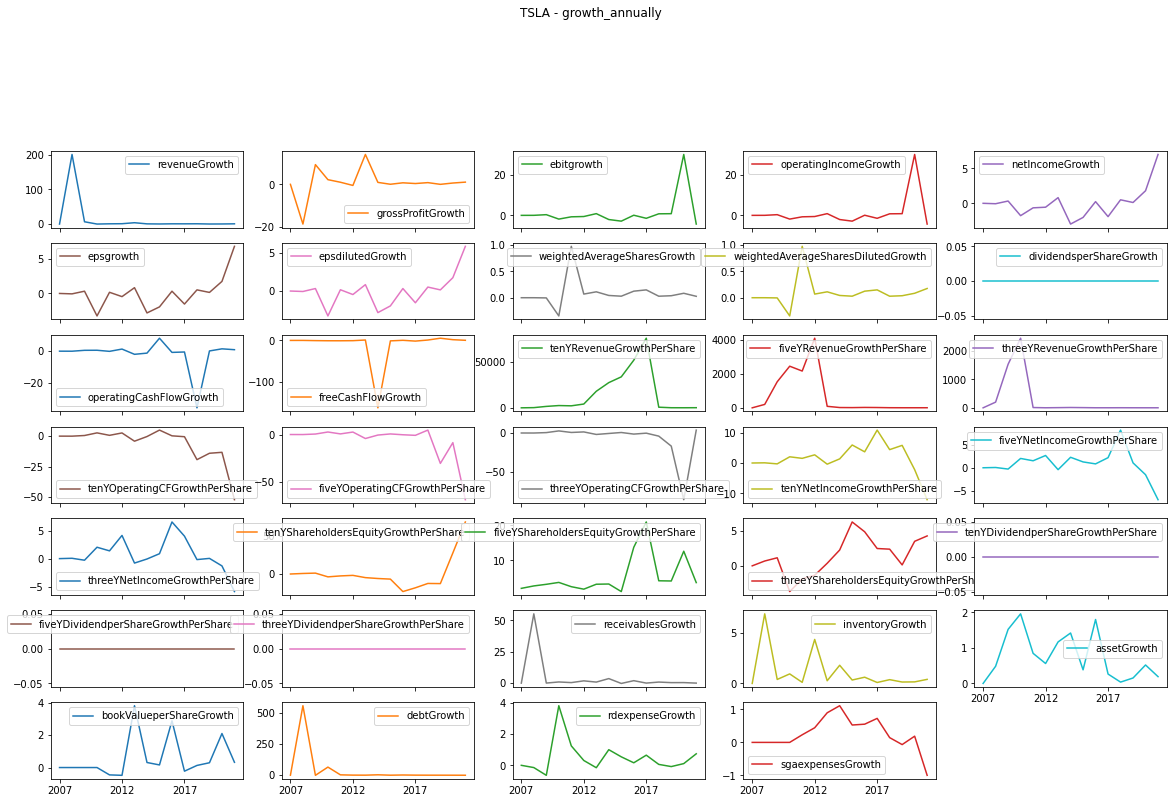

In [ ]:
item = 'growth_annually'
eval(item).transpose().sort_index().plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=ticker+' - '+item);

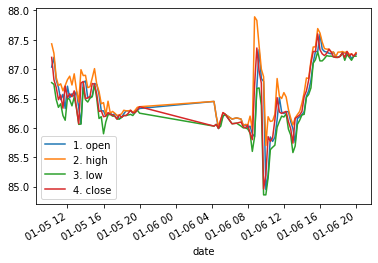

In [ ]:
# https://github.com/RomelTorres/alpha_vantage

# !pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='ZV8BBNPZR47ASG02', output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata

ticker = 'GOOGL'
data, meta_data = ts.get_intraday(ticker)
data.iloc[:,:-1].plot();

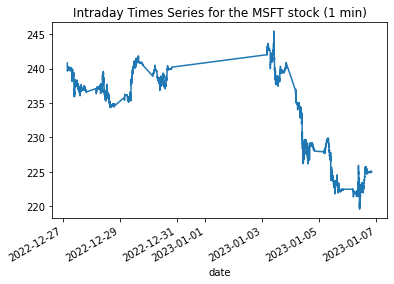

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='ZV8BBNPZR47ASG02', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

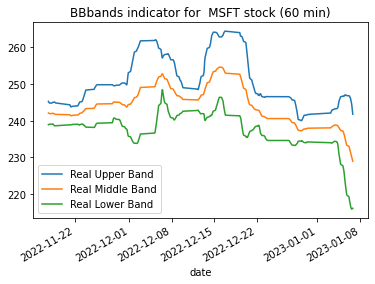

In [ ]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='ZV8BBNPZR47ASG02', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

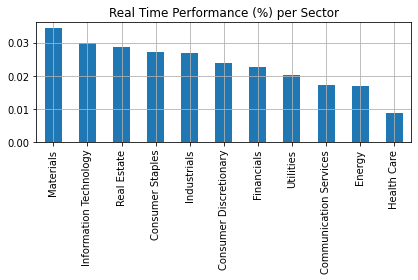

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='ZV8BBNPZR47ASG02', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

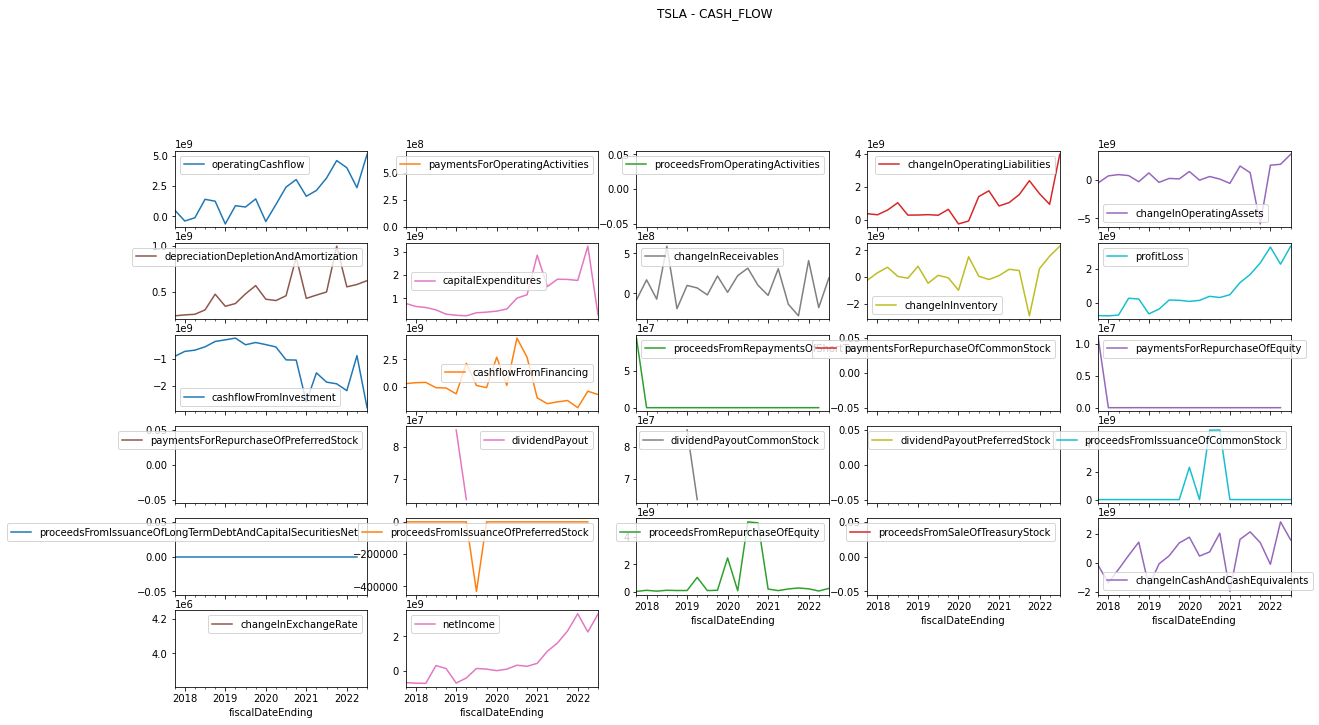

In [ ]:
import requests

APIKEY = 'ZV8BBNPZR47ASG02'
SYMBOL = 'TSLA'
# FUNCTION = 'BALANCE_SHEET'
# FUNCTION = 'INCOME_STATEMENT'
FUNCTION = 'CASH_FLOW'

url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&apikey={APIKEY}'
r = requests.get(url)
data = r.json()

# https://datascientyst.com/convert-datetime-to-quarter-in-pandas/
import pandas as pd
quarterly = pd.DataFrame.from_dict(data['quarterlyReports'])
quarterly['fiscalDateEnding'] = pd.to_datetime(quarterly['fiscalDateEnding']).dt.to_period('Q')
quarterly = quarterly.set_index('fiscalDateEnding').sort_index()
quarterly.iloc[:,1:] = quarterly.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
quarterly.plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False, title=f"{SYMBOL} - {FUNCTION}");

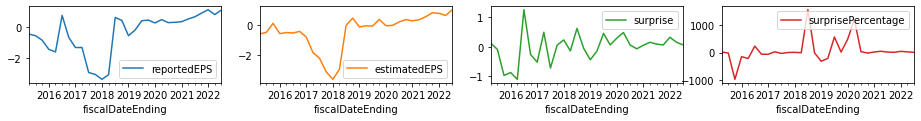

In [ ]:
import requests

FUNCTION = 'EARNINGS'
SYMBOL = 'TSLA'
APIKEY = 'ZV8BBNPZR47ASG02'

url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&apikey={APIKEY}'
r = requests.get(url)
data = r.json()

import pandas as pd
quarterly = pd.DataFrame.from_dict(data['quarterlyEarnings'])
quarterly['fiscalDateEnding'] = pd.to_datetime(quarterly['fiscalDateEnding']).dt.to_period('Q')
quarterly = quarterly.set_index('fiscalDateEnding').sort_index()
quarterly['reportedDate'] = pd.to_datetime(quarterly['reportedDate']).dt.to_period('Q')

quarterly.iloc[:,1:] = quarterly.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
quarterly[-30:].plot(subplots=True, layout=(12,5), figsize=(20,20), sharey=False, logy=False);

In [ ]:
quarterly.corr().iloc[0,1].round(2), quarterly.corr().iloc[3,2].round(2)

(0.95, 0.85)

In [ ]:
FUNCTION = 'EARNINGS_CALENDAR'
SYMBOLS = ['AAPL', 'GOLD', 'DVN', 'INTC', 'META', 'MPW', 'GOOGL', 'KSS', 'PYPL', 'TGT', 'WBA', 'VZ']
APIKEY = 'ZV8BBNPZR47ASG02'

url = f'https://www.alphavantage.co/query?function={FUNCTION}&horizon=3month&apikey={APIKEY}'
data = pd.read_csv(url, index_col='symbol')
data['reportDate'] = pd.to_datetime(data['reportDate'])
data['fiscalDateEnding'] = pd.to_datetime(data['fiscalDateEnding'])
data.loc[SYMBOLS].sort_values('reportDate')

name reportDate fiscalDateEnding  estimate  \
symbol                                                                       
VZ        Verizon Communications Inc 2023-01-24       2022-12-31      1.19   
INTC                      Intel Corp 2023-01-26       2022-12-31      0.20   
PYPL             PayPal Holdings Inc 2023-01-30       2022-12-31      1.19   
META    Meta Platforms Inc - Class A 2023-02-01       2022-12-31      2.21   
MPW     Medical Properties Trust Inc 2023-02-01       2022-12-31      0.28   
AAPL                       Apple Inc 2023-02-02       2022-12-31      1.97   
GOOGL         Alphabet Inc - Class A 2023-02-02       2022-12-31      1.18   
DVN                Devon Energy Corp 2023-02-14       2022-12-31      1.97   
GOLD               Barrick Gold Corp 2023-02-15       2022-12-31      0.18   
KSS                      Kohl`s Corp 2023-02-27       2022-11-30       NaN   
KSS                      Kohl`s Corp 2023-02-27       2023-01-31      1.03   
TGT                      Target Corp 2023-02-27       2023-01-31      1.39   
WBA     Walgreens Boots Alliance Inc 2023-03-29       2023-02-28      1.10   

       currency  
symbol           
VZ          USD  
INTC        USD  
PYPL        USD  
META        USD  
MPW         USD  
AAPL        USD  
GOOGL       USD  
DVN         USD  
GOLD        USD  
KSS         USD  
KSS         USD  
TGT         USD  
WBA         USD

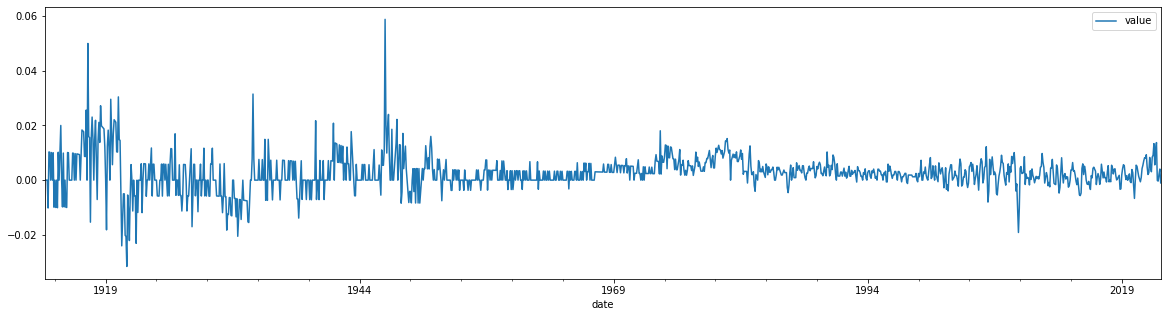

In [ ]:
import requests

FUNCTION = 'CPI'
APIKEY = 'ZV8BBNPZR47ASG02'

url = f'https://www.alphavantage.co/query?function={FUNCTION}&interval=monthly&apikey={APIKEY}'
r = requests.get(url)
data = r.json()

data = pd.DataFrame(data['data'])
data['date'] = pd.to_datetime(data['date']).dt.to_period('M')
data = data.set_index('date').sort_index().apply(pd.to_numeric, errors='coerce')
data.pct_change().plot(figsize=(20,5));

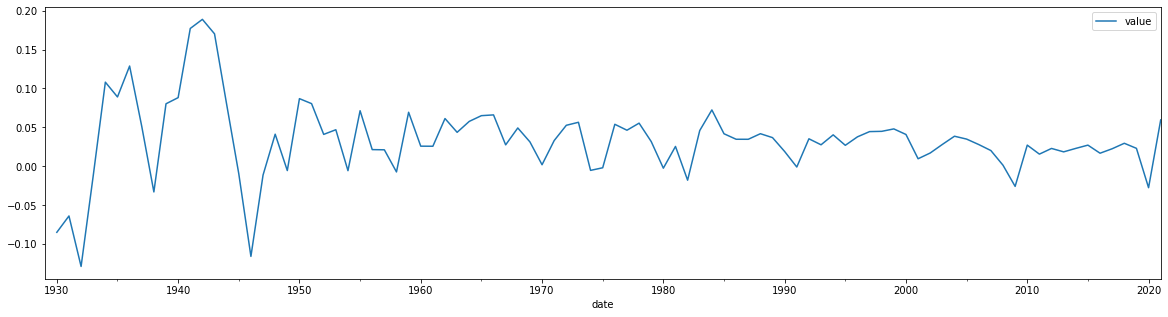

In [ ]:
import requests

FUNCTION = 'REAL_GDP'
APIKEY = 'ZV8BBNPZR47ASG02'

url = f'https://www.alphavantage.co/query?function={FUNCTION}&interval=annual&apikey={APIKEY}'
r = requests.get(url)
data = r.json()

data = pd.DataFrame(data['data'])
data['date'] = pd.to_datetime(data['date']).dt.to_period('Y')
data = data.set_index('date').sort_index().apply(pd.to_numeric, errors='coerce')
data.pct_change().plot(figsize=(20,5));

In [ ]:
import pandas_datareader.data as pdd
from datetime import datetime as dt
import matplotlib.pyplot as plt

start = dt(1950, 1, 1)
# end = dt(2022, 12, 1)
df = pdd.DataReader(['CPIAUCSL', 'CPILFESL', 'SP500', 'GDP', 'DGS10', 'FPCPITOTLZGUSA', 'CORESTICKM159SFRBATL'], 'fred', start)
df['SP500']
# data = df['SP500'] / df['GDP']
# data.dropna().plot(figsize=(20,5))
# plt.axhline(y = df[data].dropna()[-1], color = 'r', linestyle = 'dotted')

DATE
1950-01-01        NaN
1950-02-01        NaN
1950-03-01        NaN
1950-04-01        NaN
1950-05-01        NaN
               ...   
2023-01-06    3895.08
2023-01-09    3892.09
2023-01-10    3919.25
2023-01-11    3969.61
2023-01-12    3983.17
Name: SP500, Length: 16276, dtype: float64

### Jitta
The following code can be used to extract info of the top best recommendations from Jitta.
```
const cards = document.getElementsByClassName("lbFdHI");

let output = []

for (let card of cards) {
    let data = [];
    // data.push(card.children[0].innerHTML)
    data.push(card.children[1].innerHTML)
    data.push(card.children[2].children[1].innerHTML)
    data.push(card.children[3].children[0].children[0].children[1].children[1].innerHTML)
    // Safety Scores over 1000% contain commas and affect csv conversion.
    //data.push(card.children[3].children[0].children[1].children[0].innerHTML)
    data.push(card.children[3].children[0].children[1].children[1].innerHTML.slice(0,1))
    output.push(data)
}

var winPrint = window.open();
winPrint.document.write('<title>Jitta</title>');
//winPrint.document.write("Symbol,Score,Loss,Safety,Under<br>");
winPrint.document.write("Symbol,Score,Loss,Under<br>");

for (let i of output) {
    winPrint.document.write(i + "<br>");
}
```

[*********************100%***********************]  50 of 50 completed


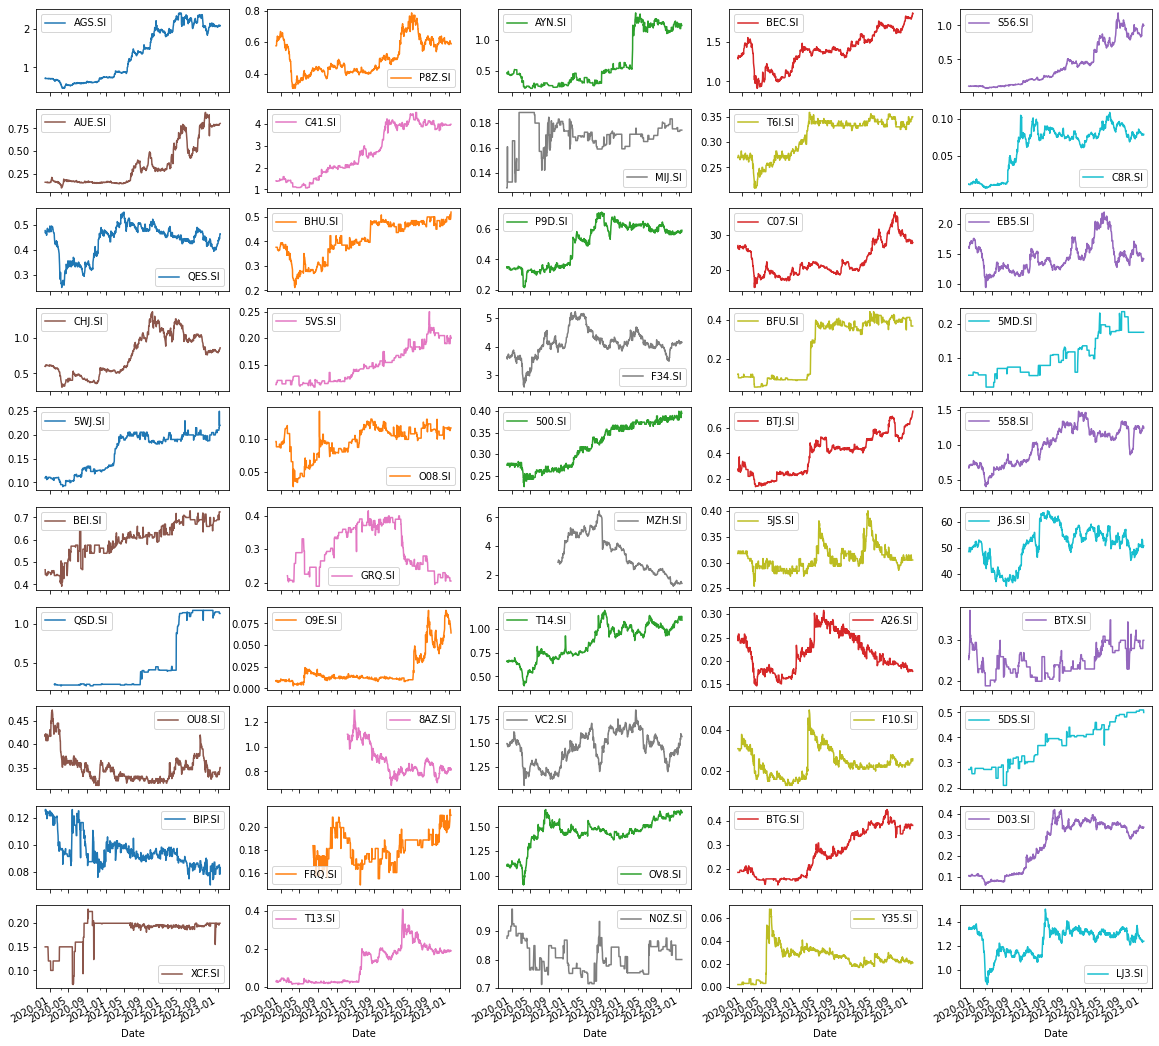

In [ ]:
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd

start = '2019-12-01'
end = '2020-12-25'

# sgx = pd.read_csv('sgx.csv')['Symbol'].str.split(':', expand=True)[1]
tickers = [i+'.SI' for i in sgx[:50]]

data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(10,5), figsize=(20,20), sharey=False, logy=False);

In [ ]:
[i + ' - ' + yf.Ticker(i).info['shortName'] for i in tickers]

['AGS.SI - TheHourGlass',
 'P8Z.SI - Bumitama Agri',
 'AYN.SI - Global Testing',
 'BEC.SI - BRC Asia',
 'S56.SI - SamuderaShipping',
 'AUE.SI - Golden Energy',
 'C41.SI - Cortina',
 'MIJ.SI - $ Alliance HC',
 'T6I.SI - ValueMax',
 'C8R.SI - $ Jiutian Chemical',
 'QES.SI - ChinaSunsine',
 'BHU.SI - SUTL Enterprise',
 'P9D.SI - Civmec',
 'C07.SI - Jardine C&C',
 'EB5.SI - First Resources',
 'CHJ.SI - Uni-Asia Grp',
 '5VS.SI - Hafary',
 'F34.SI - Wilmar Intl',
 'BFU.SI - Tye Soon',
 '5MD.SI - $ Soon Lian',
 '5WJ.SI - $ MoneyMax Fin',
 'O08.SI - Ossia Intl^',
 '500.SI - Tai Sin Electric',
 'BTJ.SI - A-Sonic Aero',
 '558.SI - UMS',
 'BEI.SI - LHT',
 'GRQ.SI - $ Don Agro',
 'MZH.SI - Nanofilm',
 '5JS.SI - Indofood Agri',
 'J36.SI - JMH USD',
 'QSD.SI - $ Resources Gbl',
 'O9E.SI - Parkson Retail^',
 'T14.SI - TJ DaRenTang USD',
 'A26.SI - Sinarmas Land',
 'BTX.SI - Anchun Intl',
 'OU8.SI - Centurion',
 '8AZ.SI - Aztech Gbl',
 'VC2.SI - Olam Group',
 'F10.SI - $ FJ Benjamin',
 '5DS.SI - $ Meg

[*********************100%***********************]  50 of 50 completed


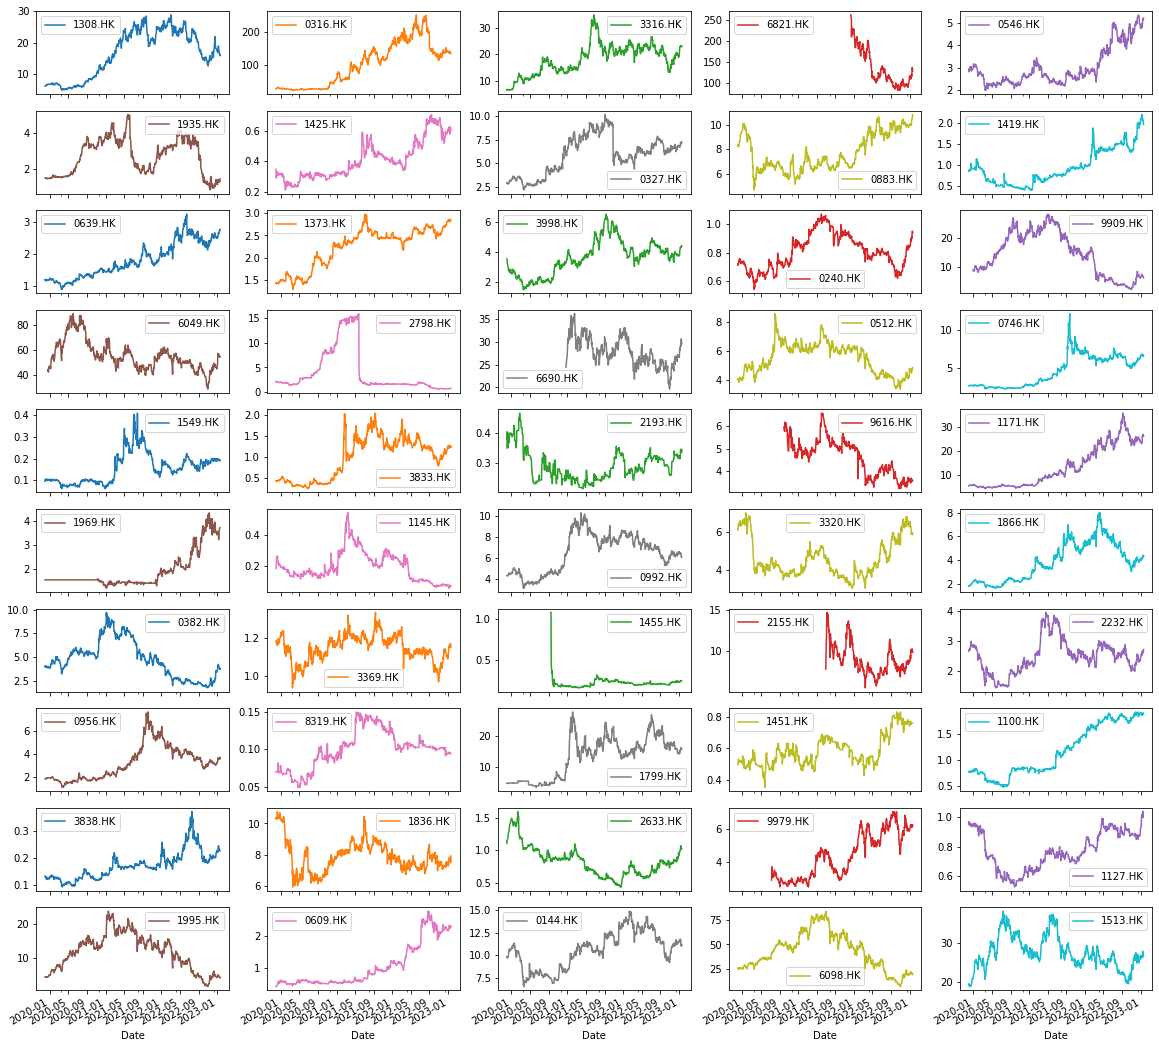

In [2]:
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd

start = '2019-12-01'
end = '2020-12-25'

hkse = pd.read_csv('hkse.csv')['Symbol'].str.split(':', expand=True)[1]
tickers = [i+'.HK' for i in hkse[:50]]

data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(10,5), figsize=(20,20), sharey=False, logy=False);

In [3]:
[i + ' - ' + yf.Ticker(i).info['shortName'] for i in tickers]

['1308.HK - SITC',
 '0316.HK - OOIL',
 '3316.HK - BINJIANG SER',
 '6821.HK - ASYMCHEM',
 '0546.HK - FUFENG GROUP',
 '1935.HK - JH EDUCATION',
 '1425.HK - JUSTIN ALLEN H',
 '0327.HK - PAX GLOBAL',
 '0883.HK - CNOOC',
 '1419.HK - HUMAN HEALTH',
 '0639.HK - SHOUGANG RES',
 '1373.HK - IH RETAIL',
 '3998.HK - BOSIDENG',
 '0240.HK - BUILD KING HOLD',
 '9909.HK - POWERLONG CM',
 '6049.HK - POLY PPT SER',
 '2798.HK - PER ENERGY',
 '6690.HK - HAIER SMARTHOME',
 '0512.HK - GRAND PHARMA',
 '0746.HK - L & M CHEMICAL',
 '1549.HK - EVER HARVEST GP',
 '3833.HK - XINXIN MINING',
 '2193.HK - MAN KING HOLD',
 '9616.HK - NEUEDU',
 '1171.HK - YANKUANG ENERGY',
 '1969.HK - CHINA CHUNLAI',
 '1145.HK - COURAGE INV',
 '0992.HK - LENOVO GROUP',
 '3320.HK - CHINARES PHARMA',
 '1866.HK - CHINA XLX FERT',
 '0382.HK - EDVANTAGE GROUP',
 '3369.HK - QHD PORT',
 '1455.HK - FOURACE IND GP',
 '2155.HK - MORIMATSU INTL',
 '2232.HK - CRYSTAL INTL',
 '0956.HK - CHINA SUNTIEN',
 '8319.HK - EXPERT SYS',
 '1799.HK - XINTE EN

[*********************100%***********************]  50 of 50 completed


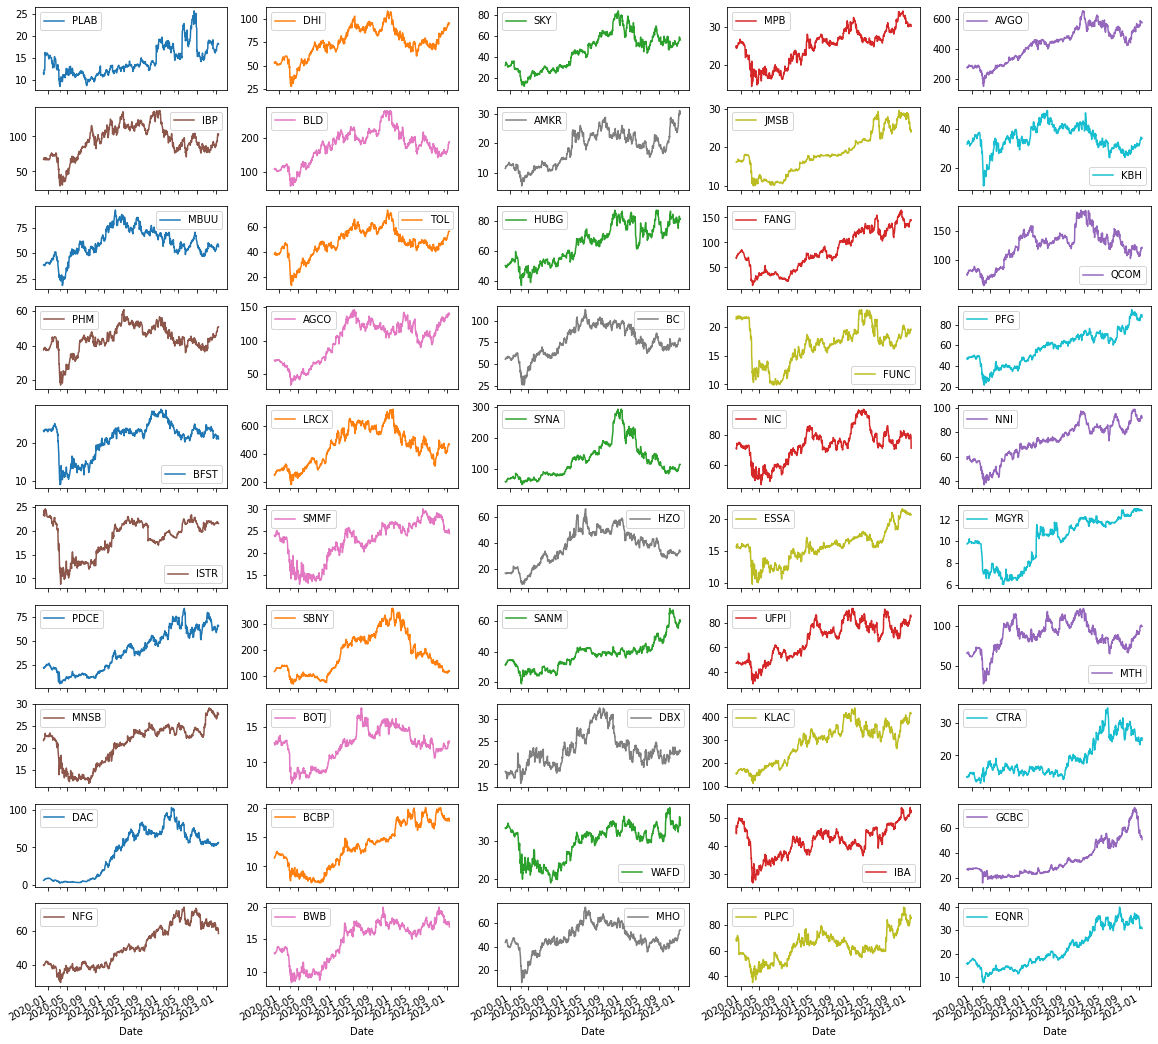

In [5]:
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd

start = '2019-12-01'
end = '2020-12-25'

nyse = pd.read_csv('nyse.csv')['Symbol'].str.split(':', expand=True)[1]
tickers = [i for i in nyse[:50]]

data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(10,5), figsize=(20,20), sharey=False, logy=False);

In [6]:
[i + ' - ' + yf.Ticker(i).info['shortName'] for i in tickers]

['PLAB - Photronics, Inc.',
 'DHI - D.R. Horton, Inc.',
 'SKY - Skyline Champion Corporation',
 'MPB - Mid Penn Bancorp',
 'AVGO - Broadcom Inc.',
 'IBP - Installed Building Products, In',
 'BLD - TopBuild Corp.',
 'AMKR - Amkor Technology, Inc.',
 'JMSB - John Marshall Bancorp, Inc.',
 'KBH - KB Home',
 'MBUU - Malibu Boats, Inc.',
 'TOL - Toll Brothers, Inc.',
 'HUBG - Hub Group, Inc.',
 'FANG - Diamondback Energy, Inc.',
 'QCOM - QUALCOMM Incorporated',
 'PHM - PulteGroup, Inc.',
 'AGCO - AGCO Corporation',
 'BC - Brunswick Corporation',
 'FUNC - First',
 'PFG - Principal Financial Group Inc',
 'BFST - Business First Bancshares, Inc.',
 'LRCX - Lam Research Corporation',
 'SYNA - Synaptics Incorporated',
 'NIC - Nicolet Bankshares Inc.',
 'NNI - Nelnet, Inc.',
 'ISTR - Investar Holding Corporation',
 'SMMF - Summit Financial Group, Inc.',
 'HZO - MarineMax, Inc.  (FL)',
 'ESSA - ESSA Bancorp, Inc.',
 'MGYR - Magyar Bancorp, Inc.',
 'PDCE - PDC Energy, Inc.',
 'SBNY - Signature Bank'

['J69U.SI - FRASERS CENTREPOINT TRUST', 'M44U.SI - Mapletree Log Tr', 'N2IU.SI - Mapletree PanAsia Com Tr', 'ME8U.SI - Mapletree Ind Tr', 'D05.SI - DBS']
[*********************100%***********************]  5 of 5 completed


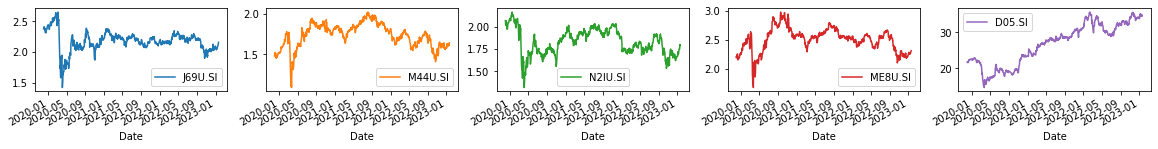

In [2]:
# Kelvin Learns Investing 2023 dividend stocks
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd

start = '2019-12-01'
end = '2020-12-25'

# nyse = pd.read_csv('nyse.csv')['Symbol'].str.split(':', expand=True)[1]
tickers = ['J69U.SI', 'M44U.SI', 'N2IU.SI',  'ME8U.SI', 'D05.SI']

print([i + ' - ' + yf.Ticker(i).info['shortName'] for i in tickers])

data = yf.download(tickers, start)['Adj Close'][tickers]
data.plot(subplots=True, layout=(10,5), figsize=(20,20), sharey=False, logy=False);

In [3]:
data.corr()

J69U.SI   M44U.SI   N2IU.SI   ME8U.SI    D05.SI
J69U.SI  1.000000  0.249667  0.753849  0.334806  0.093054
M44U.SI  0.249667  1.000000  0.425828  0.876370  0.007031
N2IU.SI  0.753849  0.425828  1.000000  0.310596  0.066506
ME8U.SI  0.334806  0.876370  0.310596  1.000000 -0.095299
D05.SI   0.093054  0.007031  0.066506 -0.095299  1.000000